In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
from workspace import nometools as nome

In [3]:
main_path = Path('..')
preprocessing_path = main_path / 'Data' / 'Preprocessing_LNDR_HNDR'
intersect_path = main_path / 'Data' / 'intersect_regions'

#### GpC methylation in regions

In [4]:
region = 'promoter'
# region = 'intron.1.start'
# region = 'intron.1.end'
# region = 'intron.2.start'

In [5]:
infile = intersect_path / f'GCH.{region}.intersect.bed'
df_GCH_intersect = nome.get_methylation(infile, region=region)

In [6]:
def plot_avg_methylation_levels(df, context, select_genes=[], fig = True, c = 'grey', label = None, rel=False, inter_start=None, inter_end=None):
    
    if len(select_genes) == 0: 
        all_meth_pos_rel = list(df['meth_pos_rel'])
        all_meth_rate = list(df['meth_rate'])
        all_coverage = list(df['coverage'])

        assert len(all_meth_pos_rel) == len(all_meth_rate) == len(all_coverage)

        av_dict = dict()
        seen_pos = set()
        for p in range(len(all_meth_pos_rel)):
            rel_pos_x = all_meth_pos_rel[p]
            meth_rate = all_meth_rate[p]
            coverage = all_coverage[p]
            
            #AVERAGE
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []
            
            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
    else:
        av_dict = {}
        seen_pos = set()
        group = df[df['gene_name'].isin(select_genes)]
        for rel_pos_x, meth_rate, coverage in zip(group['meth_pos_rel'], group['meth_rate'], group['coverage']):
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []

            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
            

    if fig:
        plt.figure(figsize=(15, 7), facecolor='w', edgecolor='k')

    x = []
    y = []

    for rel_pos_x in sorted(av_dict.keys()):
        if rel:
            if rel_pos_x >= inter_start and rel_pos_x <= inter_end:
                if len(av_dict[rel_pos_x]['meth']) >= 500: ## to remove artifact
                    x.append(rel_pos_x)
                    y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))
        else:
            if len(av_dict[rel_pos_x]['meth']) >= 500: ## to remove artifact
                x.append(rel_pos_x)
                y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))

    plt.axvline(x=0, linestyle='--', c='dimgray')
    if label is None:
        plt.plot(x, y, "-", color=c, alpha=1.0)
    else:
        plt.plot(x, y, "-", color=c, label=label, alpha=0.7)
        plt.legend()
        
    # plt.xlabel("DNA position [bp]", fontsize=16)
    plt.xlim(-2000, 1000)
    plt.xticks(fontsize=13)

    if context == 'GCH':
        ylab = "100-GpC methylation level"
    if context == 'HCG':
        ylab = "CpG methylation level"
    plt.ylabel(ylab, fontsize=16)
    # plt.ylim(bottom=68, top=80)
    plt.ylim(top=80)
    plt.yticks(fontsize=13)

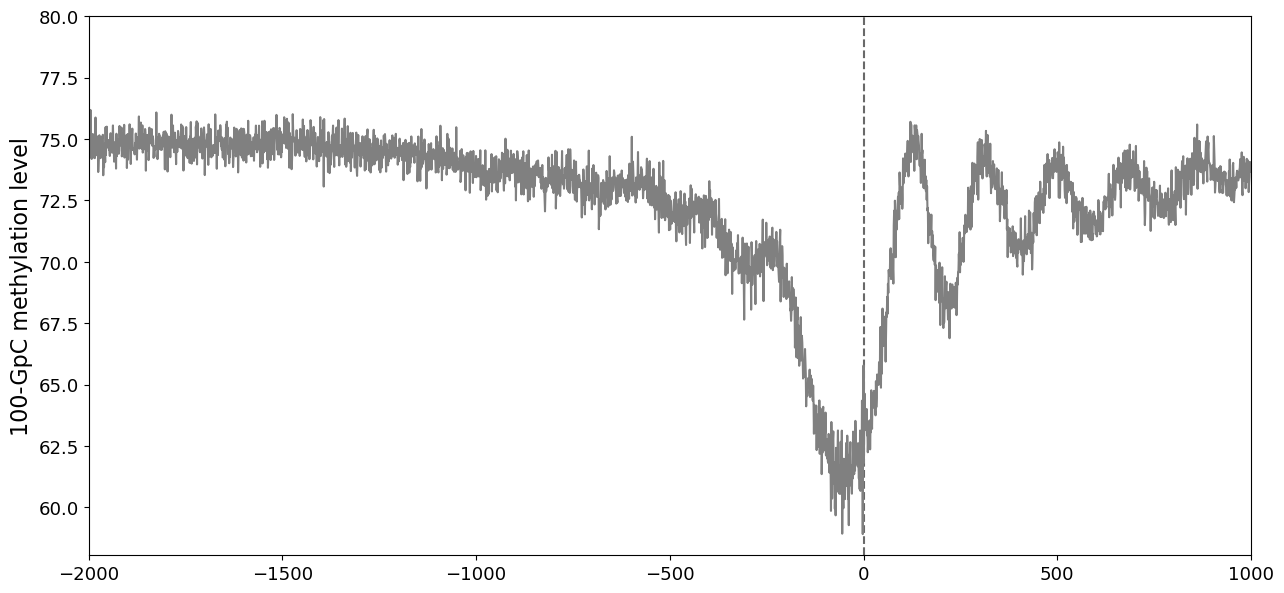

In [7]:
plot_avg_methylation_levels(df_GCH_intersect, 'GCH')

#### HNDR and LNDR positioning

In [42]:
# region = 'promoter'
# region = 'intron.1.start'
# region = 'intron.1.end'
region = 'intron.2.start'

In [43]:
infile = intersect_path / f'NDR.{region}.intersect.bed'
df_NDR_pos = nome.get_nuc_positions(infile, region)

In [44]:
df_NDR_pos.head()

,trans_id,refid,chrom,intron.2.start_start,intron.2.start_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,ENST00000616125.5-928336,ENST00000616125.5,chr1,928336,931336,925941,944153,+,930239,930439,1903,2103,-97,103,200
1,ENST00000341065.8-929089,ENST00000341065.8,chr1,929089,932089,930311,944575,+,930239,930439,1150,1350,-850,-650,200
2,ENST00000338591.8-959552,ENST00000338591.8,chr1,959552,962552,960583,965719,+,961139,961539,1587,1987,-413,-13,400
3,ENST00000341290.6-977880,ENST00000341290.6,chr1,977880,980880,975203,982093,-,978739,978939,1941,2141,-59,141,200
4,ENST00000433179.4-977880,ENST00000433179.4,chr1,977880,980880,975197,982093,-,978739,978939,1941,2141,-59,141,200


In [45]:
infile = intersect_path / f'NOR.{region}.intersect.bed'
df_NOR_pos = nome.get_nuc_positions(infile, region)

In [46]:
df_NOR_pos.head()

,trans_id,refid,chrom,intron.2.start_start,intron.2.start_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,ENST00000339381.6-1329938,ENST00000339381.6,chr1,1329938,1332938,1331279,1335314,+,1330319,1331939,381,2001,-1619,1,1620
1,ENST00000338660.5-1435484,ENST00000338660.5,chr1,1435484,1438484,1435522,1440765,+,1436959,1437179,1475,1695,-525,-305,220
2,ENST00000338660.5-1435484,ENST00000338660.5,chr1,1435484,1438484,1435522,1440765,+,1437579,1438099,2095,2615,95,615,520
3,ENST00000476993.2-1435484,ENST00000476993.2,chr1,1435484,1438484,1435689,1442882,+,1436959,1437179,1475,1695,-525,-305,220
4,ENST00000476993.2-1435484,ENST00000476993.2,chr1,1435484,1438484,1435689,1442882,+,1437579,1438099,2095,2615,95,615,520


In [47]:
df_NDR_pos.shape, df_NOR_pos.shape

((14150, 15), (1928, 15))

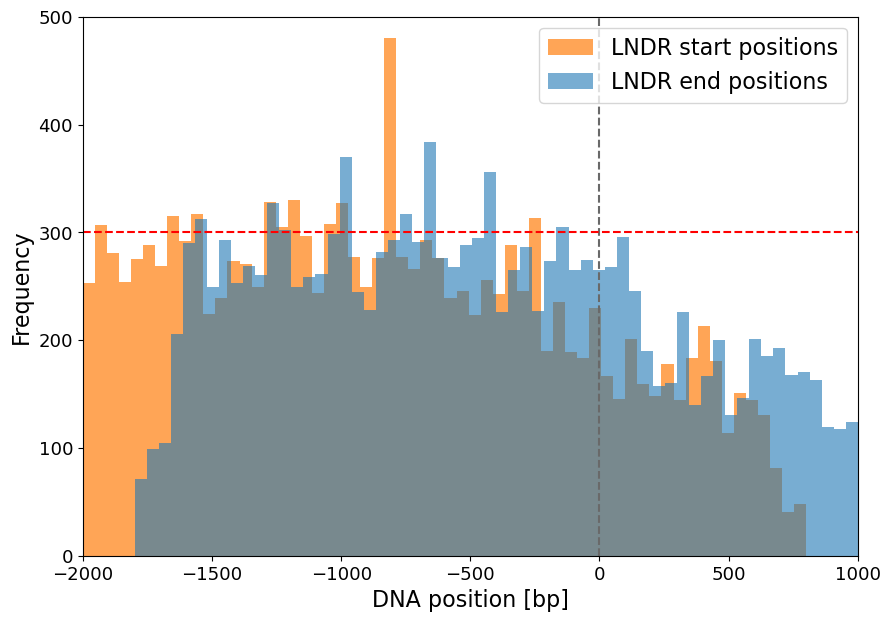

In [48]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure(figsize=(10, 7))

plt.hist(df_NDR_pos['nuc_start_promo_rel'], bins=60, color='tab:orange', histtype='bar', density=False, label="LNDR start positions", alpha = 0.7)
plt.hist(df_NDR_pos['nuc_end_promo_rel'],  bins=60, color='tab:blue', histtype='bar', density=False, label="LNDR end positions", alpha = 0.6)

plt.xlabel("DNA position [bp]", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlim(-2000, 1000)
plt.ylim(0, 500)
plt.axvline(x=0, linestyle='--', c='dimgray')
plt.axhline(y=300, linestyle='--', c='red')
plt.legend(fontsize=16)
plt.show()

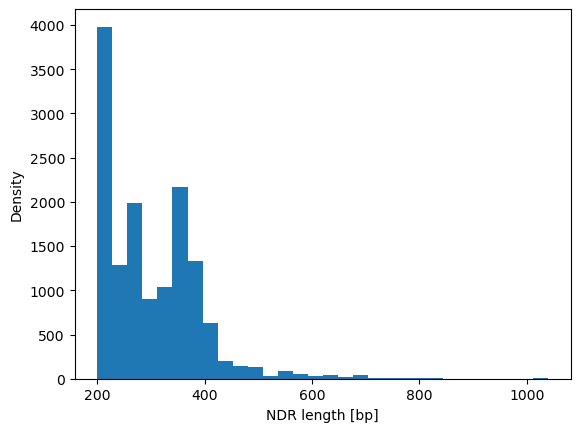

In [49]:
plt.figure()

plt.hist(df_NDR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

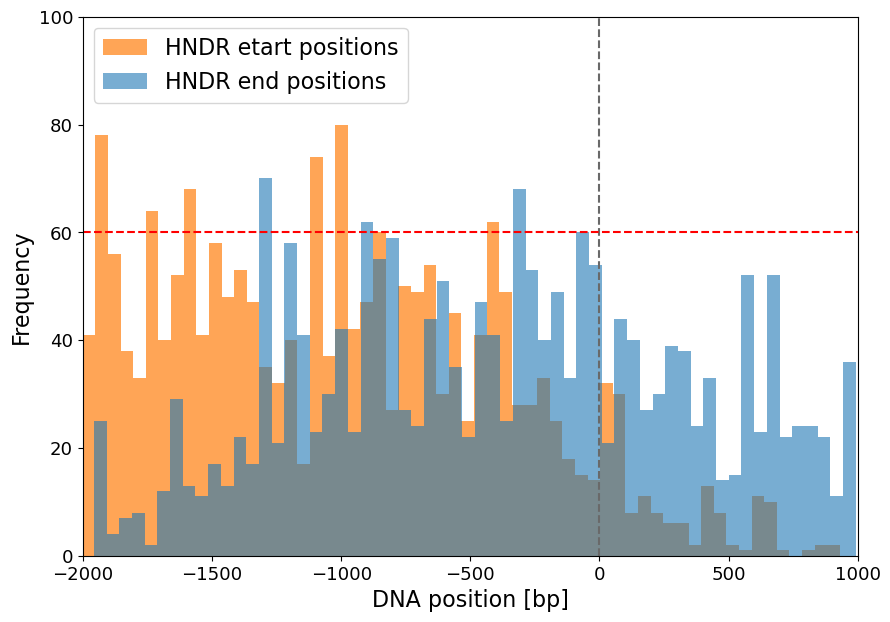

In [50]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure(figsize=(10, 7))

plt.hist(df_NOR_pos['nuc_start_promo_rel'], bins=60, color='tab:orange', histtype='bar', density=False, label="HNDR etart positions", alpha = 0.7)
plt.hist(df_NOR_pos['nuc_end_promo_rel'],  bins=60, color='tab:blue', histtype='bar', density=False, label="HNDR end positions", alpha = 0.6)

plt.xlabel("DNA position [bp]", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlim(-2000, 1000)
plt.ylim(0, 100)
plt.axvline(x=0, linestyle='--', c='dimgray')
plt.axhline(y=60, linestyle='--', c='red')
plt.legend(fontsize=16)
plt.show()

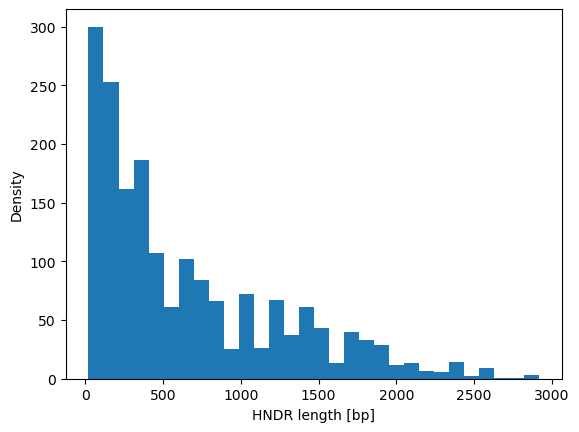

In [39]:
plt.figure()

plt.hist(df_NOR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("HNDR length [bp]")
plt.ylabel("Density")
plt.show()

#### CpG Methylation in regions

In [ ]:
# region = 'promoter'
# region = 'intron.1.start'
# region = 'intron.1.end'
region = 'intron.2.start'

In [ ]:
infile = intersect_path / f'HCG.{region}.intersect.bed'
df_HCG_intersect = nome.get_methylation(infile, region=region)

In [ ]:
infile = intersect_path / f'HCG.{region}.intersect.random.bed'
df_HCG_intersect_random = nome.get_methylation(infile, region=region)

In [ ]:
def plot_avg_methylation_levels(df, context, select_genes=[], fig = True, c = 'grey', label = None, rel=False, inter_start=None, inter_end=None):
    
    if len(select_genes) == 0: 
        all_meth_pos_rel = list(df['meth_pos_rel'])
        all_meth_rate = list(df['meth_rate'])
        all_coverage = list(df['coverage'])

        assert len(all_meth_pos_rel) == len(all_meth_rate) == len(all_coverage)

        av_dict = dict()
        seen_pos = set()
        for p in range(len(all_meth_pos_rel)):
            rel_pos_x = all_meth_pos_rel[p]
            meth_rate = all_meth_rate[p]
            coverage = all_coverage[p]
            
            #AVERAGE
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []
            
            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
    else:
        av_dict = {}
        seen_pos = set()
        group = df[df['gene_name'].isin(select_genes)]
        for rel_pos_x, meth_rate, coverage in zip(group['meth_pos_rel'], group['meth_rate'], group['coverage']):
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []

            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
            

    if fig:
        plt.figure(figsize=(15, 7), facecolor='w', edgecolor='k')

    x = []
    y = []

    for rel_pos_x in sorted(av_dict.keys()):
        if rel:
            if rel_pos_x >= inter_start and rel_pos_x <= inter_end:
                if len(av_dict[rel_pos_x]['meth']) >= 500: ## to remove artifact
                    x.append(rel_pos_x)
                    y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))
        else:
            if len(av_dict[rel_pos_x]['meth']) >= 500: ## to remove artifact
                x.append(rel_pos_x)
                y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))

    plt.axvline(x=0, linestyle='--', c='dimgray')
    if label is None:
        plt.plot(x, y, "-", color=c, alpha=1.0)
    else:
        plt.plot(x, y, "-", color=c, label=label, alpha=0.7)
        plt.legend()
        
    plt.xlabel("DNA position [bp]", fontsize=18)
    plt.xlim(-2000, 1000)
    plt.xticks(fontsize=15)

    if context == 'GCH':
        ylab = "100-GpC methylation level"
    if context == 'HCG':
        ylab = "CpG methylation level"
    plt.ylabel(ylab, fontsize=18)
    # plt.ylim(bottom=68, top=80)
    # plt.ylim(top=80)
    plt.yticks(fontsize=15)

In [ ]:
plot_avg_methylation_levels(df_HCG_intersect_random, 'HCG', fig=True, c='darkgray', label='random')
plot_avg_methylation_levels(df_HCG_intersect, 'HCG', fig=False, c='dimgray', label='experimental')

#### Steric Clash Plot

In [ ]:
import pickle

In [ ]:
def plot_nbr_clashs(steric_path, clash_dict_loc, info_dict_loc, save=False):
    with open(clash_dict_loc, 'rb') as fin:
        clash_dict = pickle.load(fin)
    with open(info_dict_loc, 'rb') as fin:
        info_nbr_dict = pickle.load(fin)

    nbr_dnmt_residues = info_nbr_dict["model_dnmt_nbr_residues"]
    nbr_dnmt_atoms = info_nbr_dict["model_dnmt_nbr_atoms"]
    dnmt_atoms_consider_clash = info_nbr_dict["dnmt_atoms_consider_clash"]
    
    x = sorted(clash_dict.keys())
    #x = [12]
    y = []

    #lab_txt = []
    for pos in x:
        #nbr_clash_residues = len(clash_dict[pos]['steric_clash_list'].keys())
        #perc_clash_res = (float(nbr_clash_residues)/float(nbr_dnmt_residues))*100
        #rmsd = round(clash_dict[pos]['rmsd'],2)
        all_clashes = 0
        for clash_res in clash_dict[pos]['steric_clash_list'].keys():
            atom_clashes = clash_dict[pos]['steric_clash_list'][clash_res]
            nbr_clash_atoms = 0
            seen_atoms = set()
            for ac in atom_clashes: #['X_TYR923_N', 'A_ARG42_CD', 2.0103261]
                dnmt_atom = ac[0]
                nuc_atom = ac[1]
                if dnmt_atom not in seen_atoms:
                    seen_atoms.add(dnmt_atom)
                    nbr_clash_atoms += 1
            all_clashes += nbr_clash_atoms

        perc_clash_atoms = (float(all_clashes)/float(dnmt_atoms_consider_clash))*100
        y.append(perc_clash_atoms)
    
    #norm clashed st acc is probability between 0 and 1
    max_clash = np.max(y)
    min_clash = np.min(y)
    print ("max_clash", max_clash)
    print ("min_clash", min_clash)
    diff = max_clash - min_clash
    y_access = []
    for y_val in y:
        norm_val = 100-(float(y_val-min_clash)/float(diff))*100 #100- because is accessibility
        y_access.append(norm_val)
    
    if save:
        with open(steric_path / 'x_y_perc_file.txt', 'w') as fout:
            x_y_acc_dict = dict() 
            x_y_dict = dict()
            for i in range(0,len(x)):
                fout.write(str(x[i]) + "----" + str(y[i]) + "\n")
                x_y_dict[x[i]] = y[i]
                x_y_acc_dict[x[i]] = y_access[i]

        with open(steric_path / 'x_y_dict', 'wb') as fout:
            pickle.dump(x_y_dict, fout, -1)
        with open(steric_path / 'x_y_acc_dict', 'wb') as fout:
            pickle.dump(x_y_acc_dict, fout, -1)
    
    '''
    % ATOMS CLASHED
    '''
    fig = plt.figure(figsize=(18, 7))
    ax = plt.subplot(111)
    
    #plt.title('Superposition of DNMT1 (3PTA) and the nucleosome (1KX5)')
    ax.plot(x, y, linestyle="-", marker="o", linewidth=2)
    for pos in range(0,len(x)):
        #ax.text(x[pos]+0.3,y[pos],rmsd_list[pos])
        ax.text(x[pos]+0.2, y[pos]+0.7, x[pos], fontsize=12)
        
    plt.xlim(0,140)
    plt.xticks(range(0,len(x)+5,5), fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Nucleosome position [bp]", fontsize=18)
    plt.ylabel("DNMT1 atoms clashing [%]", fontsize=18)
    
    ax.axvline(x=74,c="grey",linewidth=2,linestyle="--")#4169e1
    
    
    '''
    ACCESSIBILITY: 100-clasehd atoms
    '''
    fig = plt.figure(figsize=(15, 7))
    ax = plt.subplot(111)
    plt.title('Superposition of DNMT1 (3PTA) and the nucleosome (1KX5)')
    ax.plot(x,y_access, linestyle="-" ,marker="o", linewidth=2)
    for pos in range(0,len(x)):
        ax.text(x[pos]+0.3, y_access[pos], x[pos])
        
    plt.xlim(0, 140)
    plt.xticks(range(0,len(x)+5,5), fontsize=15)
    plt.xlabel("Nucleosome position")
    plt.ylabel("Accessibility [%]")
    
    ax.axvline(x=74,c="black",linewidth=2,linestyle="-")#4169e1
    ax.axhline(y=95,c="black",linewidth=2,linestyle="--")#4169e1
    ax.text(-1,94.5,'95')

In [ ]:
steric_path = main_path / 'superposition'

In [ ]:
clash_dict_loc = steric_path / 'clash_dict'
info_dict_loc = steric_path / 'info_nbr_dict'
plot_nbr_clashs(steric_path, clash_dict_loc, info_dict_loc, save=True)